In [1]:
# An efficient data structure. 
import pandas as pd
%pylab inline

# Import the data
X = pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")

Populating the interactive namespace from numpy and matplotlib


In [2]:
X.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

In [3]:
X.rename(columns={'Entry Id': 'id'}, inplace=True)
X.rename(columns={'Please indicate your gender.': 'gender'}, inplace=True)
X.rename(columns={'Please select the category that includes your age.': 'age'}, inplace=True)
X.rename(columns={'What is your marital status?': 'marital'}, inplace=True)
X.rename(columns={'What best describes your employment status?': 'employment'}, inplace=True)
X.rename(columns={'Are you or have you ever been in military service?': 'military'}, inplace=True)
X.rename(columns={'Do you currently have children under the age of 18 living in your household?': 'children'}, inplace=True)
X.rename(columns={'What best describes your level of education?': 'education'}, inplace=True)
X.rename(columns={'Treated country data': 'country'}, inplace=True)
X.rename(columns={'(For U. S. redditors) In which state do you live?': 'state'}, inplace=True)
X.rename(columns={'Which one of the following ranges includes your total yearly household income before taxes?': 'income'}, inplace=True)
X.rename(columns={'treated subreddit data': 'subreddit'}, inplace=True)
X.rename(columns={'Are you a dog or a cat person?': 'dogcat'}, inplace=True)
X.rename(columns={'If you were a cheese, what cheese would you be?': 'cheese'}, inplace=True)
X.rename(columns={'Unnamed: 14': 'u14'}, inplace=True)
X.rename(columns={'Unnamed: 15': 'u15'}, inplace=True)
X.rename(columns={'Unnamed: 16': 'u16'}, inplace=True)
X.rename(columns={'Unnamed: 17': 'u17'}, inplace=True)
X.rename(columns={'Unnamed: 18': 'u18'}, inplace=True)
X.rename(columns={'Unnamed: 19': 'u19'}, inplace=True)

In [4]:
X['continent'] = 'na'

In [5]:
X.columns

Index([u'id', u'gender', u'age', u'marital', u'employment', u'military',
       u'children', u'education', u'country', u'state', u'income',
       u'subreddit', u'dogcat', u'cheese', u'u14', u'u15', u'u16', u'u17',
       u'u18', u'u19', u'continent'],
      dtype='object')

In [6]:
X

,id,gender,age,marital,employment,military,children,education,country,state,...,subreddit,dogcat,cheese,u14,u15,u16,u17,u18,u19,continent
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,...,getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN,na
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,...,gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN,na
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,...,snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN,na
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,...,spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN,na
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,...,aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN,na
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,...,gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN,na
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,...,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN,na
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,...,fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN,na
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,...,todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN,na
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,...,NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN,na


In [7]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [8]:
describe_categorical(X)

,gender,age,marital,employment,military,children,education,country,state,income,subreddit,dogcat,cheese,u14,u15,u16,u17,u18,u19,continent
count,32754,32754,32754,32754,32754,32754,32754,32754,20846,32754,28419,32752,32754,3,3,1,1,1,1,32754
unique,3,8,7,7,3,3,8,440,52,9,1833,7,17,3,2,1,1,1,1,1
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,United States,California,"Under $20,000",askreddit,I like dogs.,Other,7/13/11 15:47,public,I like cats.,Other,7/14/11 13:22,public,na
freq,26418,15802,10428,14814,30526,27488,11046,20967,3401,7892,2123,17149,6562,1,2,1,1,1,1,32754


In [9]:
# Drop U.S. state and strange data
X.drop(['state'], axis=1, inplace=True)
X.drop(['subreddit'], axis=1, inplace=True)
X.drop(['u14'], axis=1, inplace=True)
X.drop(['u15'], axis=1, inplace=True)
X.drop(['u16'], axis=1, inplace=True)
X.drop(['u17'], axis=1, inplace=True)
X.drop(['u18'], axis=1, inplace=True)
X.drop(['u19'], axis=1, inplace=True)

In [10]:
describe_categorical(X)

,gender,age,marital,employment,military,children,education,country,income,dogcat,cheese,continent
count,32754,32754,32754,32754,32754,32754,32754,32754,32754,32752,32754,32754
unique,3,8,7,7,3,3,8,440,9,7,17,1
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,United States,"Under $20,000",I like dogs.,Other,na
freq,26418,15802,10428,14814,30526,27488,11046,20967,7892,17149,6562,32754


In [11]:
# Strip white space and convert to lower case
X.country = X.country.str.strip().str.lower()

In [12]:
X.country.value_counts()

united states                                                               20981
canada                                                                       3016
united kingdom                                                               1934
australia                                                                    1082
germany                                                                       423
new zealand                                                                   330
sweden                                                                        327
norway                                                                        294
ireland                                                                       254
finland                                                                       192
denmark                                                                       189
none                                                                          177
india           

In [13]:
# Fix most continent data
X.loc[X.country == 'united kingdom', 'continent'] = 'eu'
X.loc[X.country == 'new zealand', 'continent'] = 'au'
X.loc[X.country == 'germany', 'continent'] = 'eu'
X.loc[X.country == 'sweden', 'continent'] = 'eu'
X.loc[X.country == 'norway', 'continent'] = 'eu'
X.loc[X.country == 'ireland', 'continent'] = 'eu'
X.loc[X.country == 'finland', 'continent'] = 'eu'
X.loc[X.country == 'denmark', 'continent'] = 'eu'
X.loc[X.country == 'india', 'continent'] = 'as'
X.loc[X.country == 'the netherlands', 'continent'] = 'eu'
X.loc[X.country == 'netherlands', 'continent'] = 'eu'
X.loc[X.country == 'france', 'continent'] = 'eu'
X.loc[X.country == 'belgium', 'continent'] = 'eu'
X.loc[X.country == 'poland', 'continent'] = 'eu'
X.loc[X.country == 'brazil', 'continent'] = 'sa'
X.loc[X.country == 'spain', 'continent'] = 'eu'
X.loc[X.country == 'portugal', 'continent'] = 'eu'
X.loc[X.country == 'switzerland', 'continent'] = 'eu'
X.loc[X.country == 'south af', 'continent'] = 'af'
X.loc[X.country == 'singapore', 'continent'] = 'as'
X.loc[X.country == 'england', 'continent'] = 'eu'
X.loc[X.country == 'italy', 'continent'] = 'eu'
X.loc[X.country == 'japan', 'continent'] = 'as'
X.loc[X.country == 'austria', 'continent'] = 'eu'
X.loc[X.country == 'romania', 'continent'] = 'eu'
X.loc[X.country == 'malaysia', 'continent'] = 'as'
X.loc[X.country == 'philippines', 'continent'] = 'as'
X.loc[X.country == 'argentina', 'continent'] = 'sa'
X.loc[X.country == 'estonia', 'continent'] = 'eu'
X.loc[X.country == 'israel', 'continent'] = 'eu'
X.loc[X.country == 'iceland', 'continent'] = 'eu'
X.loc[X.country == 'croatia', 'continent'] = 'eu'
X.loc[X.country == 'china', 'continent'] = 'as'
X.loc[X.country == 'greece', 'continent'] = 'eu'
X.loc[X.country == 'scotland', 'continent'] = 'eu'
X.loc[X.country == 'south korea', 'continent'] = 'as'
X.loc[X.country == 'hong kong', 'continent'] = 'as'
X.loc[X.country == 'chile', 'continent'] = 'sa'
X.loc[X.country == 'russia', 'continent'] = 'eu'
X.loc[X.country == 'hungary', 'continent'] = 'eu'
X.loc[X.country == 'republic of ireland', 'continent'] = 'eu'
X.loc[X.country == 'indonesia', 'continent'] = 'as'
X.loc[X.country == 'colombia', 'continent'] = 'sa'
X.loc[X.country == 'turkey', 'continent'] = 'as'
X.loc[X.country == 'united arab emirates', 'continent'] = 'as'
X.loc[X.country == 'lithuania', 'continent'] = 'eu'
X.loc[X.country == 'slovenia', 'continent'] = 'eu'
X.loc[X.country == 'bulgaria', 'continent'] = 'eu'
X.loc[X.country == 'thailand', 'continent'] = 'as'
X.loc[X.country == 'czech republic', 'continent'] = 'eu'
X.loc[X.country == 'taiwan', 'continent'] = 'as'
X.loc[X.country == 'northern ireland', 'continent'] = 'eu'
X.loc[X.country == 'serbia', 'continent'] = 'eu'
X.loc[X.country == 'uruguay', 'continent'] = 'sa'
X.loc[X.country == 'pakistan', 'continent'] = 'as'
X.loc[X.country == 'latvia', 'continent'] = 'eu'
X.loc[X.country == 'united kingdon', 'continent'] = 'eu'
X.loc[X.country == 'slovakia', 'continent'] = 'eu'
X.loc[X.country == 'saudi arabia', 'continent'] = 'as'
X.loc[X.country == 'kuwait', 'continent'] = 'as'
X.loc[X.country == 'ukraine', 'continent'] = 'eu'
X.loc[X.country == 'malta', 'continent'] = 'eu'
X.loc[X.country == 'russian federation', 'continent'] = 'eu'
X.loc[X.country == 'venezuela', 'continent'] = 'sa'
X.loc[X.country == 'bahrain', 'continent'] = 'as'
X.loc[X.country == 'united kingdom of great britain and northern ireland', 'continent'] = 'eu'
X.loc[X.country == 'qatar', 'continent'] = 'as'
X.loc[X.country == 'wales', 'continent'] = 'eu'
X.loc[X.country == 'bosnia and herzegovina', 'continent'] = 'eu'
X.loc[X.country == 'peru', 'continent'] = 'sa'
X.loc[X.country == 'egypt', 'continent'] = 'af'
X.loc[X.country == 'macedonia', 'continent'] = 'eu'
X.loc[X.country == 'lebanon', 'continent'] = 'as'
X.loc[X.country == 'vietnam', 'continent'] = 'as'
X.loc[X.country == 'morocco', 'continent'] = 'af'
X.loc[X.country == 'sri lanka', 'continent'] = 'as'
X.loc[X.country == 'uk', 'continent'] = 'eu'
X.loc[X.country == 'kenya', 'continent'] = 'af'
X.loc[X.country == 'luxembourg', 'continent'] = 'eu'
X.loc[X.country == 'ecuador', 'continent'] = 'sa'
X.loc[X.country == 'cyprus', 'continent'] = 'eu'
X.loc[X.country == 'trinidad and tobago', 'continent'] = 'eu'
X.loc[X.country == 'belarus', 'continent'] = 'eu'
X.loc[X.country == 'holland', 'continent'] = 'eu'
X.loc[X.country == 'cambodia', 'continent'] = 'as'
X.loc[X.country == 'bolivia', 'continent'] = 'sa'
X.loc[X.country == 'tunisia', 'continent'] = 'af'
X.loc[X.country == 'afghanistan', 'continent'] = 'as'
X.loc[X.country == 'united kindom', 'continent'] = 'eu'
X.loc[X.country == 'paraguay', 'continent'] = 'sa'

In [14]:
X.continent.value_counts()

na    25889
eu     5475
as      762
au      330
sa      275
af       23
Name: continent, dtype: int64

In [15]:
# Drop country
X.drop(['country'], axis=1, inplace=True)

In [16]:
describe_categorical(X)

,gender,age,marital,employment,military,children,education,income,dogcat,cheese,continent
count,32754,32754,32754,32754,32754,32754,32754,32754,32752,32754,32754
unique,3,8,7,7,3,3,8,9,7,17,6
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,"Under $20,000",I like dogs.,Other,na
freq,26418,15802,10428,14814,30526,27488,11046,7892,17149,6562,25889


In [17]:
X.gender.value_counts()

Male      26418
Female     6135
None        201
Name: gender, dtype: int64

In [18]:
X.age.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: age, dtype: int64

In [19]:
X.marital.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: marital, dtype: int64

In [20]:
X.employment.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: employment, dtype: int64

In [21]:
X.military.value_counts()

No      30526
Yes      2223
none        5
Name: military, dtype: int64

In [22]:
X.children.value_counts()

No      27488
Yes      5047
None      219
Name: children, dtype: int64

In [23]:
X.education.value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: education, dtype: int64

In [24]:
X.income.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: income, dtype: int64

In [25]:
X.dogcat.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                   5
askreddit              2
 Reddit.com            1
movies                 1
Name: dogcat, dtype: int64

In [26]:
# Replace data
X.dogcat = X.dogcat.replace('I like dogs.', 'Dogs')
X.dogcat = X.dogcat.replace('I like cats.', 'Cats')
X.dogcat = X.dogcat.replace('I like turtles.', 'Turles')
X.dogcat = X.dogcat.replace(['askreddit', ' Reddit.com', 'movies'], 'none')

In [27]:
X.dogcat.value_counts()

Dogs      17149
Cats      11152
Turles     4442
none          9
Name: dogcat, dtype: int64

In [28]:
X.cheese.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
none                5
 f7u12              2
1                   1
programming')       1
 awww               1
 Pics               1
Name: cheese, dtype: int64

In [29]:
X.cheese = X.cheese.replace([' f7u12', '1', "programming')", ' awww', ' Pics'], 'none')

In [30]:
X.cheese.value_counts()

Other        6562
Cheddar      6101
Brie         3742
Provolone    3454
Swiss        3214
Feta         2991
Goat         2516
Munster      1770
American     1438
Paneer        618
Limburger     337
none           11
Name: cheese, dtype: int64

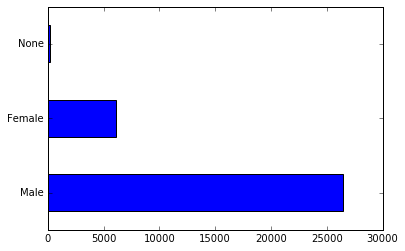

In [31]:
X.gender.value_counts().plot(kind='barh')

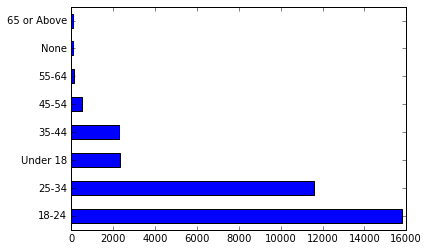

In [32]:
X.age.value_counts().plot(kind='barh')

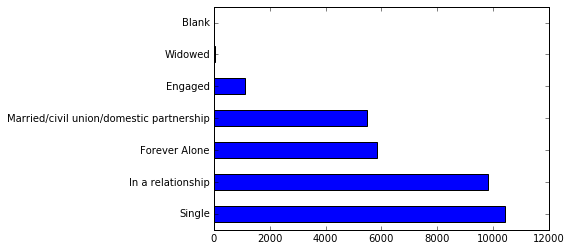

In [33]:
X.marital.value_counts().plot(kind='barh')

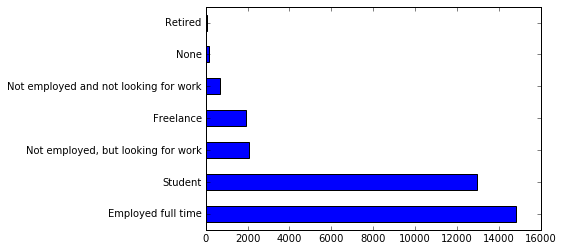

In [34]:
X.employment.value_counts().plot(kind='barh')

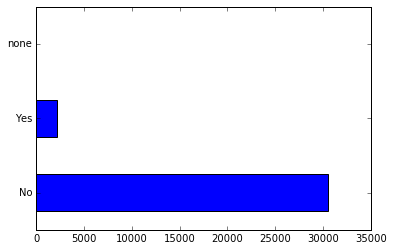

In [35]:
X.military.value_counts().plot(kind='barh')

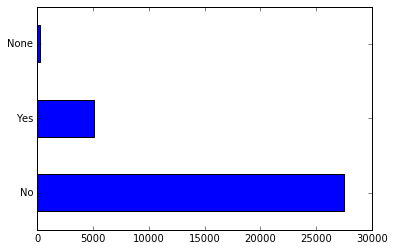

In [36]:
X.children.value_counts().plot(kind='barh')

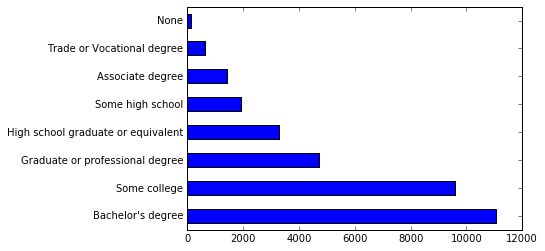

In [37]:
X.education.value_counts().plot(kind='barh')

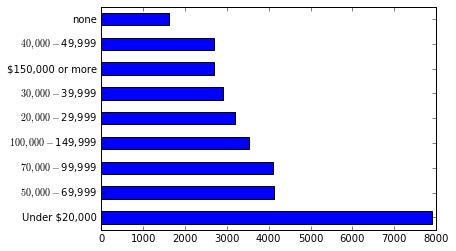

In [38]:
X.income.value_counts().plot(kind='barh')

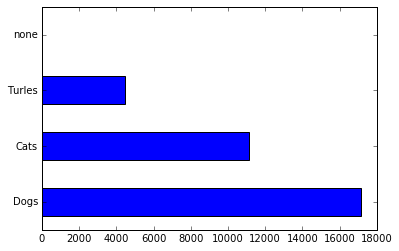

In [39]:
X.dogcat.value_counts().plot(kind='barh')

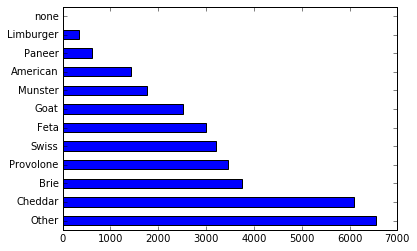

In [40]:
X.cheese.value_counts().plot(kind='barh')

In [41]:
categorical_variables = ['gender', 'age', 'marital', 'employment', 
                         'military', 'children', 'education', 'income', 'dogcat', 'cheese', 'continent']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    # X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [42]:
X.columns

Index([u'id', u'gender_Female', u'gender_Male', u'gender_None', u'age_18-24',
       u'age_25-34', u'age_35-44', u'age_45-54', u'age_55-64',
       u'age_65 or Above', u'age_None', u'age_Under 18', u'marital_Blank',
       u'marital_Engaged', u'marital_Forever Alone',
       u'marital_In a relationship',
       u'marital_Married/civil union/domestic partnership', u'marital_Single',
       u'marital_Widowed', u'employment_Employed full time',
       u'employment_Freelance', u'employment_None',
       u'employment_Not employed and not looking for work',
       u'employment_Not employed, but looking for work', u'employment_Retired',
       u'employment_Student', u'military_No', u'military_Yes',
       u'military_none', u'children_No', u'children_None', u'children_Yes',
       u'education_Associate degree', u'education_Bachelor's degree',
       u'education_Graduate or professional degree',
       u'education_High school graduate or equivalent', u'education_None',
       u'education_Some c

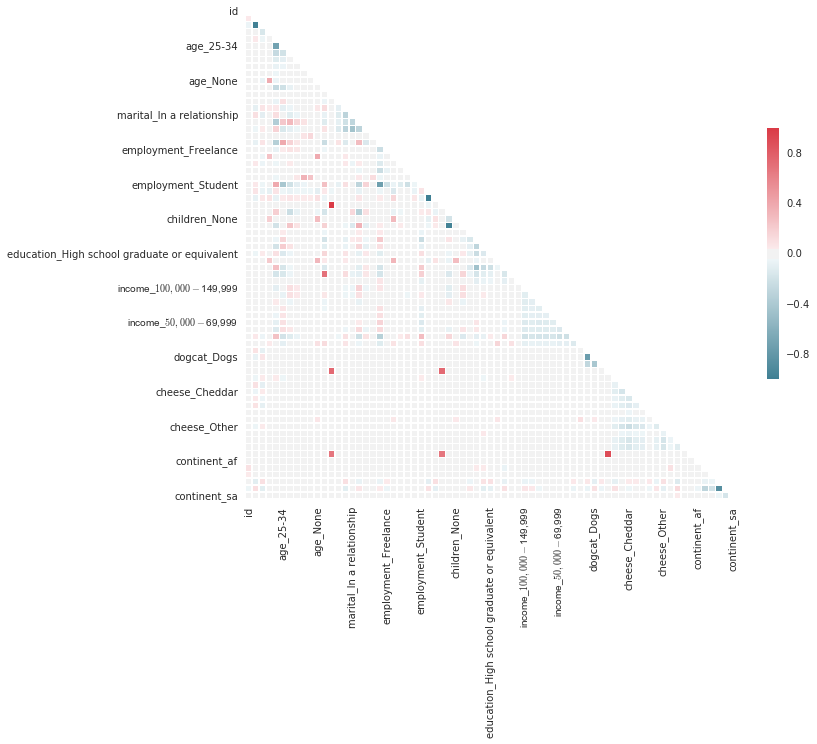

In [43]:
from string import letters
import numpy as np
#import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(letters[:26]))

# Compute the correlation matrix
#corr = d.corr()
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)